In [1]:
from bs4 import BeautifulSoup

import importlib
from mqdq import rhyme, utils, rhyme_classes, babble
from mqdq import line_analyzer as la

import random
import operator
import bisect
import string
import copy
import re
import scipy as sp
import pandas as pd
import glob
import umap
import os
import subprocess

In [8]:
random.seed(42)

In [2]:
met = babble.Babbler.from_file('mqdq/OV-meta.xml', name='Metamorphoses')

In [3]:
utils.blat(met.hexameter(4),phon=True,scan=False)

Et simul   omnipotens     cliuoque  inimica       Coronis
Ēt `si.mul ōm.`ni.po.tens kli.`wō._ kwi.ni.`mī.ka Ko.`rō.nis

Altera    decipiat     cessataque     dixit    amori,
`Āl.te.ra dē.`ki.pi.āt kes.`sā.ta.kwe `dik.sit a.`mō.ri,

O fuit   Hippalmon    Nereida     contudit    illis
Ō `fu.it Hip.`pal.mon Nē.`rē.i.da `kon.tu.dit `īl.lis

Seruatoque     fuit,   "faueas"    ceruicibus     agro
Ser.wā.`tō.kwe `fu.īt, "`fa.we.ās" ker.`wī.ki.bus `āg.ro


In [4]:
allbabs = []

tris_bab = babble.Babbler.from_file(*sorted(glob.glob('mqdq/OV-tri*.xml')), name = 'Tristia')
allbabs.append(tris_bab)

tib_babs = babble.multibabs(sorted(glob.glob('mqdq/TIB-ele*.xml')),"Tibullus")
allbabs.extend(tib_babs)

tib_single_bab = babble.Babbler.from_file(*sorted(glob.glob('mqdq/TIB-ele*.xml')),name ="Tibullus")
allbabs.append(tib_single_bab)

cat_soup, cat_ll = utils.slurp('mqdq/CATVLL-carm.xml')
cat64_bab = babble.Babbler(utils.clean(cat_soup('division')[63]('line')), name = "Cat64")
allbabs.append(cat64_bab)

aen_babs = babble.bookbabs('mqdq/VERG-aene.xml', 'Aeneid')
allbabs.extend(aen_babs)

aen_single_bab = babble.Babbler.from_file('mqdq/VERG-aene.xml', name='Aeneid')
allbabs.append(aen_single_bab)

geo_babs = babble.bookbabs('mqdq/VERG-geor.xml', 'Georgics')
allbabs.extend(geo_babs)

geo_single_bab = babble.Babbler.from_file('mqdq/VERG-geor.xml', name='Georgics')
allbabs.append(geo_single_bab)

sat_babs = babble.bookbabs('mqdq/IVV-satu.xml', 'Juv. Sat.')
allbabs.extend(sat_babs)

sat_single_bab = babble.Babbler.from_file('mqdq/IVV-satu.xml', name='Juv. Sat.')
allbabs.append(sat_single_bab)

met_babs = babble.bookbabs('mqdq/OV-meta.xml', 'Metamorphoses')
allbabs.extend(met_babs)

met_single_bab = babble.Babbler.from_file('mqdq/OV-meta.xml', name='Metamorphoses')
allbabs.append(met_single_bab)

puni_babs = babble.bookbabs('mqdq/SIL-puni.xml', 'Punica')
allbabs.extend(puni_babs)

puni_single_bab = babble.Babbler.from_file('mqdq/SIL-puni.xml', name='Punica')
allbabs.append(puni_single_bab)

theb_babs = babble.bookbabs('mqdq/STAT-theb.xml', 'Thebaid')
allbabs.extend(theb_babs)

theb_single_bab = babble.Babbler.from_file('mqdq/STAT-theb.xml', name='Thebaid')
allbabs.append(theb_single_bab)

phars_babs = babble.bookbabs('mqdq/LVCAN-phar.xml', 'Pharsalia')
allbabs.extend(phars_babs)

phars_single_bab = babble.Babbler.from_file('mqdq/LVCAN-phar.xml', name='Pharsalia')
allbabs.append(phars_single_bab)

prop_babs = babble.multibabs(sorted(glob.glob('mqdq/PROP-ele*.xml')),"Propertius")
allbabs.extend(prop_babs)

prop_single_bab = babble.Babbler.from_file(*sorted(glob.glob('mqdq/PROP-ele*.xml')),name ="Propertius")
allbabs.append(prop_single_bab)

ep_bab = babble.Babbler.from_file('mqdq/OV-epis.xml', name="Heroides")
allbabs.append(ep_bab)

aram_bab = babble.Babbler.from_file('mqdq/OV-aram.xml', name="Ars")
allbabs.append(aram_bab)

fast_bab = babble.Babbler.from_file('mqdq/OV-fast.xml', name="Fasti")
allbabs.append(fast_bab)

arg_babs = babble.bookbabs('mqdq/VAL_FL-argo.xml', 'Argonautica')
allbabs.extend(arg_babs)

arg_single_bab = babble.Babbler.from_file('mqdq/VAL_FL-argo.xml', name='Argonautica')
allbabs.append(arg_single_bab)

rena_babs = babble.bookbabs('mqdq/LVCR-rena.xml', 'DRN')
allbabs.extend(rena_babs)

rena_single_bab = babble.Babbler.from_file('mqdq/LVCR-rena.xml', name='DRN')
allbabs.append(rena_single_bab)

apot_bab = babble.Babbler.from_file('mqdq/PRVD-apot.xml', name='Apotheosis')
allbabs.append(apot_bab)

hamart_bab = babble.Babbler.from_file('mqdq/PRVD-hama.xml', name='Hamartigenia')
allbabs.append(hamart_bab)

psych_bab = babble.Babbler.from_file('mqdq/PRVD-psyc.xml', name='Psychomachia')
allbabs.append(psych_bab)

horsat_babs = babble.multibabs(sorted(glob.glob('mqdq/HOR-sat*.xml')),"Hor. Sat.")
allbabs.extend(horsat_babs)

horsat_single_bab = babble.Babbler.from_file(*sorted(glob.glob('mqdq/HOR-sat*.xml')),name ="Hor. Sat.")
allbabs.append(horsat_single_bab)

In [5]:
_, _, r = fast_bab.scan(babble.leo, gather=True, metre="P")

In [6]:
random.shuffle(r)

In [7]:
for x in r[:50]:
    utils.nbshow(x, book=True)

In [655]:
flatten = lambda t: [item for sublist in t for item in sublist]

In [657]:
utils.nbshow(flatten(r[:10]), book=True)

In [505]:
rena_single_bab = babble.Babbler.from_file('LVCR-rena.xml', name='DRN')

In [506]:
rena_single_bab._baseline(0,"H")

(0.026, 0.028, 0.02952)

In [510]:
rena_single_bab._baseline(-2,"H")

(0.0854, 0.08878, 0.0908)

In [559]:
importlib.reload(babble)
t = babble.Babbler.from_file(*sorted(glob.glob('TIB-ele*.xml')),name ="Tibullus")


In [560]:
dft = t.examinate(n=5, tests=babble.extended_tests)
dft

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
0,Tibullus,H,leo,1.175000,,47,574,621,39,greater,1.090247e-01,1.090247e-01,39,39,39,40,52,52,52
1,Tibullus,H,slant leo,1.000000,,32,589,621,0,None,1.000000e+00,1.000000e+00,26,26,26,32,47,47,47
2,Tibullus,H,aa 0,2.714286,***,38,582,620,17,greater,3.264119e-06,3.264119e-06,12,12,12,14,16,16,16
3,Tibullus,H,axa 0,2.500000,***,50,570,620,21,greater,1.919738e-08,1.919738e-08,13,13,13,20,21,21,21
4,Tibullus,H,axxa 0,1.416667,,17,602,619,17,greater,4.925088e-01,4.925088e-01,8,8,8,12,19,19,19
5,Tibullus,H,aa -1,0.978723,,46,574,620,44,greater,3.858267e-01,3.858267e-01,36,36,36,47,57,57,57
6,Tibullus,H,axa -1,0.965517,,56,564,620,56,greater,4.956048e-01,4.956048e-01,53,53,53,58,60,60,60
7,Tibullus,H,axxa -1,0.750000,***,36,583,619,44,less,1.273673e-01,1.273673e-01,43,43,43,48,56,56,56
8,Tibullus,H,aa -2,1.051948,,81,539,620,75,greater,2.314139e-01,2.314139e-01,61,61,61,77,87,87,87
9,Tibullus,H,axa -2,1.147541,,70,550,620,62,greater,1.552855e-01,1.552855e-01,48,48,48,61,74,74,74


In [562]:
babble._pivot(dft)

,H-aa -1,H-aa -2,H-aa 0,H-aa mid,H-axa -1,H-axa -2,H-axa 0,H-axa mid,H-axxa -1,H-axxa -2,...,P-axa -1,P-axa -2,P-axa 0,P-axa mid,P-axxa -1,P-axxa -2,P-axxa 0,P-axxa mid,P-leo,P-slant leo
work,,,,,,,,,,,,,,,,,,,,,
Tibullus,0.978723,1.051948,2.714286,0.916667,0.965517,1.147541,2.5,1.090909,0.75,1.166667,...,0.910714,0.992063,0.928571,1.26,0.878049,1.166667,0.952381,0.947368,2.051282,1.307692


In [547]:
sorted(["H-" + t.name for t in babble.standard_tests])

['H-aa -1',
 'H-aa -2',
 'H-aa mid',
 'H-axa -1',
 'H-axa -2',
 'H-axa mid',
 'H-axxa -1',
 'H-axxa -2',
 'H-axxa mid',
 'H-leo',
 'H-slant leo']

In [587]:
# t.scanblat(babble.aa[0])

In [588]:
# met_single_bab.scanblat(babble.axa[0])

In [ ]:
megadf = [b.examinate(tests=babble.extended_tests) for b in allbabs]

In [480]:
long = [x for x in allbabs if not re.search('[0-9]', x.name)]

In [490]:
long.append(horsat_single_bab)

In [491]:
sum([len(x.raw_source) for x in long])

95956

In [492]:
len(long)

19

In [493]:
[x.name for x in long]

['Tristia',
 'Tibullus',
 'Aeneid',
 'Georgics',
 'Juv. Sat.',
 'Metamorphoses',
 'Punica',
 'Thebiad',
 'Pharsalia',
 'Propertius',
 'Heroides',
 'Ars',
 'Fasti',
 'Argonautica',
 'DRN',
 'Apotheosis',
 'Hamartigenia',
 'Psychomachia',
 'Hor. Sat.']

In [450]:
aen_single_bab.baselines()

{'H': {-1: (0.07128, 0.07382, 0.07516),
  -2: (0.09344, 0.09568, 0.09766),
  'mid': (0.038127648340934635, 0.039571316579086524, 0.04131112189173112),
  'leo': (0.044597943089430894, 0.04667584552845529, 0.04867678861788618)}}

In [452]:
met_single_bab.baselines()

{'H': {-1: (0.07182, 0.07374, 0.07586),
  -2: (0.09302, 0.09558, 0.09822),
  'mid': (0.048635136942183306, 0.05055257971279915, 0.0523302089480576),
  'leo': (0.051905399283870425, 0.05364424015321841, 0.05592272129236406)}}

In [570]:
full_results = pd.concat(megadf,ignore_index=True)
full_results

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
0,Tristia,H,leo,1.393617,***,131,1635,1766,91,greater,0.000033,0.000033,70,76,78,94,106,115,120
1,Tristia,H,slant leo,1.073529,,73,1693,1766,0,None,1.000000,1.000000,52,53,54,68,83,87,91
2,Tristia,H,aa 0,1.473684,***,84,1681,1765,58,greater,0.000630,0.000630,40,45,47,57,70,72,75
3,Tristia,H,axa 0,1.590164,***,97,1668,1765,61,greater,0.000007,0.000007,47,48,50,61,73,75,81
4,Tristia,H,axxa 0,1.183333,,71,1693,1764,58,greater,0.049878,0.049878,46,47,47,60,73,79,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,Hor. Sat.,H,axa -2,0.916129,,142,1968,2110,150,less,0.254738,0.254738,116,127,132,155,176,183,186
1956,Hor. Sat.,H,axxa -2,1.059603,,160,1949,2109,150,greater,0.216765,0.216765,125,127,134,151,172,177,190
1957,Hor. Sat.,H,aa mid,1.118280,,104,2007,2111,93,greater,0.132339,0.132339,76,78,80,93,111,115,119
1958,Hor. Sat.,H,axa mid,1.064516,,99,2011,2110,93,greater,0.273025,0.273025,67,78,80,93,110,112,120


In [571]:
full_results.to_pickle('full_results.pkl')

In [576]:
full_results[full_results.work=="DRN"]

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
1862,DRN,H,leo,1.046729,,336,7038,7374,325,greater,2.789580e-01,0.554065,278,289,293,321,346,351,371
1863,DRN,H,slant leo,0.943966,,219,7155,7374,0,None,1.000000e+00,1.000000,203,204,205,232,258,266,275
1864,DRN,H,aa 0,1.177033,***,246,7127,7373,205,greater,2.849098e-03,0.022022,168,175,184,209,228,235,237
1865,DRN,H,axa 0,1.169903,*,241,7131,7372,205,greater,7.513331e-03,0.046150,171,185,186,206,231,241,255
1866,DRN,H,axxa 0,1.053140,,218,7153,7371,205,greater,1.942085e-01,0.449646,177,179,183,207,227,231,233
1867,DRN,H,aa -1,1.259740,***,679,6694,7373,563,greater,4.526798e-07,0.000055,488,504,511,539,578,584,597
1868,DRN,H,axa -1,1.164835,***,636,6736,7372,563,greater,9.162254e-04,0.018679,486,498,513,546,586,589,607
1869,DRN,H,axxa -1,1.144689,***,625,6746,7371,563,greater,3.982710e-03,0.052390,495,496,503,546,586,592,594
1870,DRN,H,aa -2,1.090767,**,697,6676,7373,652,greater,3.563674e-02,0.186564,576,585,592,639,680,694,711
1871,DRN,H,axa -2,1.032812,,661,6711,7372,652,greater,3.637814e-01,0.711371,569,585,595,640,676,686,699


In [577]:
all_but_leo = full_results[
    (~full_results['test'].str.contains('leo')) & 
    (~full_results['work'].str.contains('[0-9]')) & 
    (full_results['stars'].str.contains('\*'))
].sort_values(by=['work', 'test'], ascending=True)
all_but_leo

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
301,Aeneid,H,axxa -1,1.078947,**,779,9057,9836,723,greater,0.016064,0.097343,649,674,682,722,757,767,807
298,Aeneid,H,axxa 0,1.104000,*,276,9560,9836,251,greater,0.058854,0.227498,228,229,230,250,273,279,285
1878,Apotheosis,H,aa 0,1.529412,***,52,1030,1082,35,greater,0.003812,0.003812,21,23,25,34,44,46,49
1885,Apotheosis,H,axa -2,1.195652,*,110,971,1081,90,greater,0.016150,0.016150,68,73,75,92,109,111,113
1889,Apotheosis,H,axxa mid,1.214286,*,68,1012,1080,55,greater,0.040795,0.040795,38,43,46,56,67,70,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Tristia,H,aa 0,1.473684,***,84,1681,1765,58,greater,0.000630,0.000630,40,45,47,57,70,72,75
3,Tristia,H,axa 0,1.590164,***,97,1668,1765,61,greater,0.000007,0.000007,47,48,50,61,73,75,81
17,Tristia,P,axa 0,1.268657,***,85,1679,1764,64,greater,0.006767,0.006767,45,51,55,67,77,79,83
12,Tristia,H,axa mid,1.164706,*,99,1666,1765,84,greater,0.054607,0.054607,64,67,71,85,97,102,115


In [589]:
leo_results = full_results[
    (full_results['test'].str.contains('leo')) & 
    (~full_results['work'].str.contains('[0-9]'))# & 
    #(full_results['stars'].str.contains('\*'))
].sort_values(by=['work', 'test'], ascending=True)
leo_results

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
294,Aeneid,H,leo,1.222717,***,549,9290,9839,459,greater,1.588462e-05,5.413717e-04,409,422,423,449,484,491,493
295,Aeneid,H,slant leo,1.119048,***,376,9463,9839,0,None,1.000000e+00,1.000000e+00,302,305,308,336,360,369,371
1876,Apotheosis,H,leo,1.666667,***,90,993,1083,53,greater,1.609639e-06,1.609639e-06,38,39,42,54,65,68,71
1877,Apotheosis,H,slant leo,1.236842,,47,1036,1083,0,None,1.000000e+00,1.000000e+00,24,27,29,38,48,50,53
1764,Argonautica,H,leo,1.692557,***,523,5037,5560,310,greater,2.530688e-30,1.483519e-26,273,279,282,309,336,344,350
1765,Argonautica,H,slant leo,1.343096,***,321,5239,5560,0,None,1.000000e+00,1.000000e+00,205,211,213,239,265,271,275
1596,Ars,H,leo,1.676471,***,114,1051,1165,67,greater,5.713510e-08,5.713510e-08,51,55,57,68,80,83,86
1610,Ars,P,leo,2.013514,***,149,1015,1164,71,greater,2.731984e-17,2.731984e-17,55,59,60,74,86,87,92
1597,Ars,H,slant leo,1.584906,***,84,1081,1165,0,None,1.000000e+00,1.000000e+00,39,42,43,53,62,65,67
1611,Ars,P,slant leo,1.392857,***,78,1086,1164,0,None,1.000000e+00,1.000000e+00,40,42,44,56,67,69,72


In [579]:
leo_results = full_results[full_results['test'].str.contains('leo')][~full_results['work'].str.contains('[0-9]')][full_results['stars'].str.contains('\*')].sort_values(by=['work', 'metre', 'test'], ascending=True)

/Users/ben/silius/silius_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [582]:
print(all_but_leo.drop(['f', 'sum', 'l99', 'l90', 'h90', 'h99', 'conservative'],axis=1).to_latex(
    float_format="%.4f",
    column_format=r"lclcccclcc@{\hspace{1\tabcolsep}}c@{\hspace{1\tabcolsep}}c",
    header=h,
    index=False
))

\begin{tabular}{lclcccclcc@{\hspace{1\tabcolsep}}c@{\hspace{1\tabcolsep}}c}
\toprule
          Work & Metre &      Test &  \$\textbackslash Pi\$ & Signif. &  Obs. &  Exp. &     Alt. & \$p\$-val & L\$\_\{95\}\$ & Q\$\_\{50\}\$ & H\$\_\{95\}\$ \\
\midrule
        Aeneid &     H &   axxa -1 & 1.0789 &      ** &   779 &   723 &  greater &  0.0161 &      674 &      722 &      767 \\
        Aeneid &     H &    axxa 0 & 1.1040 &       * &   276 &   251 &  greater &  0.0589 &      229 &      250 &      279 \\
    Apotheosis &     H &      aa 0 & 1.5294 &     *** &    52 &    35 &  greater &  0.0038 &       23 &       34 &       46 \\
    Apotheosis &     H &    axa -2 & 1.1957 &       * &   110 &    90 &  greater &  0.0161 &       73 &       92 &      111 \\
    Apotheosis &     H &  axxa mid & 1.2143 &       * &    68 &    55 &  greater &  0.0408 &       43 &       56 &       70 \\
   Argonautica &     H &  axxa mid & 0.8967 &      ** &   269 &   304 &     less &  0.0183 &      271 &      30

In [590]:
print(leo_results.drop(['f', 'sum', 'l99', 'l90', 'h90', 'h99', 'conservative'],axis=1).to_latex(
    float_format="%.4f",
    column_format=r"lclcccclcc@{\hspace{1\tabcolsep}}c@{\hspace{1\tabcolsep}}c",
    index=False
))

\begin{tabular}{lclcccclcc@{\hspace{1\tabcolsep}}c@{\hspace{1\tabcolsep}}c}
\toprule
          work & metre &       test &     pi & stars &    t &  expected & alternative &  binom &  l95 &  mid &  h95 \\
\midrule
        Aeneid &     H &        leo & 1.2227 &   *** &  549 &       459 &     greater & 0.0000 &  422 &  449 &  491 \\
        Aeneid &     H &  slant leo & 1.1190 &   *** &  376 &         0 &        None & 1.0000 &  305 &  336 &  369 \\
    Apotheosis &     H &        leo & 1.6667 &   *** &   90 &        53 &     greater & 0.0000 &   39 &   54 &   68 \\
    Apotheosis &     H &  slant leo & 1.2368 &       &   47 &         0 &        None & 1.0000 &   27 &   38 &   50 \\
   Argonautica &     H &        leo & 1.6926 &   *** &  523 &       310 &     greater & 0.0000 &  279 &  309 &  344 \\
   Argonautica &     H &  slant leo & 1.3431 &   *** &  321 &         0 &        None & 1.0000 &  211 &  239 &  271 \\
           Ars &     H &        leo & 1.6765 &   *** &  114 &        67 &

In [213]:
apot_bab = babble.Babbler.from_file('/Users/ben/Downloads/PRVD-apot.xml', name='Apotheosis')
df = apot_bab.examinate()

In [679]:
apot_bab = babble.Babbler.from_file('/Users/ben/Downloads/PRVD-apot.xml', name='Apotheosis')
df = apot_bab.examinate()

In [683]:
df = full_results[full_results.work=='Apotheosis']
df

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
1876,Apotheosis,H,leo,1.666667,***,90,993,1083,53,greater,0.000002,0.000002,38,39,42,54,65,68,71
1877,Apotheosis,H,slant leo,1.236842,,47,1036,1083,0,None,1.000000,1.000000,24,27,29,38,48,50,53
1878,Apotheosis,H,aa 0,1.529412,***,52,1030,1082,35,greater,0.003812,0.003812,21,23,25,34,44,46,49
1879,Apotheosis,H,axa 0,1.166667,,42,1039,1081,35,greater,0.134063,0.134063,19,24,27,36,46,48,51
1880,Apotheosis,H,axxa 0,1.162162,,43,1037,1080,35,greater,0.101153,0.101153,19,26,29,37,46,49,52
1881,Apotheosis,H,aa -1,1.059701,,71,1011,1082,69,greater,0.416138,0.416138,51,51,54,67,81,84,94
1882,Apotheosis,H,axa -1,1.088235,,74,1007,1081,69,greater,0.278238,0.278238,51,56,58,68,82,86,87
1883,Apotheosis,H,axxa -1,1.044118,,71,1009,1080,69,greater,0.409927,0.409927,51,54,57,68,79,83,89
1884,Apotheosis,H,aa -2,1.177778,,106,976,1082,90,greater,0.043281,0.043281,68,73,78,90,108,110,121
1885,Apotheosis,H,axa -2,1.195652,*,110,971,1081,90,greater,0.016150,0.016150,68,73,75,92,109,111,113


In [138]:
sorted(glob.glob('PROP-ele*.xml'))

['PROP-ele1.xml', 'PROP-ele2.xml', 'PROP-ele3.xml', 'PROP-ele4.xml']

In [684]:
print(df.drop(['f', 'sum', 'l99', 'l90', 'h90', 'h99'],axis=1).to_latex(float_format="%.4f", index=False))

\begin{tabular}{lllrlrrlrrrrr}
\toprule
       work & metre &       test &     pi & stars &    t &  expected & alternative &  binom &  conservative &  l95 &  mid &  h95 \\
\midrule
 Apotheosis &     H &        leo & 1.6667 &   *** &   90 &        53 &     greater & 0.0000 &        0.0000 &   39 &   54 &   68 \\
 Apotheosis &     H &  slant leo & 1.2368 &       &   47 &         0 &        None & 1.0000 &        1.0000 &   27 &   38 &   50 \\
 Apotheosis &     H &       aa 0 & 1.5294 &   *** &   52 &        35 &     greater & 0.0038 &        0.0038 &   23 &   34 &   46 \\
 Apotheosis &     H &      axa 0 & 1.1667 &       &   42 &        35 &     greater & 0.1341 &        0.1341 &   24 &   36 &   48 \\
 Apotheosis &     H &     axxa 0 & 1.1622 &       &   43 &        35 &     greater & 0.1012 &        0.1012 &   26 &   37 &   49 \\
 Apotheosis &     H &      aa -1 & 1.0597 &       &   71 &        69 &     greater & 0.4161 &        0.4161 &   51 &   67 &   84 \\
 Apotheosis &     H &     a

In [217]:
sat_single_bab = babble.Babbler.from_file('IVV-satu.xml', name='Juv. Sat.')

In [236]:
sat_books = utils.bookinate('IVV-satu.xml')

In [245]:
panem = rhyme.syllabify(sat_books[1][103:110])
panem.colorlink()

In [156]:
STRIP_STRESS = str.maketrans({'`':None})
def shiny_leo(ll):

    if len(ll) != 1:
        raise ValueError("Need %s line." % 1)

    l = copy.copy(ll[0])
    w1 = l.fetch("mid")
    w2 = l.fetch(-1)
    s = rhyme.word_rhyme(w1, w2)
    if not s >= 1.75:
        return None
    # once word_rhyme is above the threshold both words have syls
    try:
        f1 =l[-2].syls[0].translate(STRIP_STRESS).lower()[0]
        f2 = l[-3].syls[0].translate(STRIP_STRESS).lower()[0]
    except:
        print(l)
    if not( f1==f2 and l[-4]==w1 ):
        return None

    w1.color = w2.get_color()
    w2.color = w1.color
    w1.lock_color, w2.lock_color = True, True
    if s > w1.best_match:
        w1.best_match = s
        w1.best_word = w2
    if s > w2.best_match:
        w1.best_match = s
        w2.best_word = w1

    return ll
shiny_leo.length = 1
shiny_leo.name = "shiny leo"
shiny_leo.baseline = None

In [268]:
w = sat_single_bab._syl_source()[0][0]

In [273]:
w.syls[0].translate(str.maketrans({'`':None})).lower()

'sem'

In [293]:
shiny_pcts = [b.scan(shiny_leo) for b in allbabs]

In [294]:
shiny_pcts = [x[0]/x[1] for x in shiny_pcts]
shiny_pcts

[0.003695281409891984,
 0.0012360939431396785,
 0.002336448598130841,
 0.0,
 0.0026666666666666666,
 0.0025252525252525255,
 0.0014124293785310734,
 0.007204610951008645,
 0.002320185614849188,
 0.002232142857142857,
 0.0024752475247524753,
 0.0013774104683195593,
 0.0037128712871287127,
 0.0033407572383073497,
 0.0010964912280701754,
 0.001053740779768177,
 0.002547381292031791,
 0.003913894324853229,
 0.0037105751391465678,
 0.0,
 0.0,
 0.0018323408153916628,
 0.005917159763313609,
 0.011976047904191617,
 0.0,
 0.0,
 0.005847953216374269,
 0.0,
 0.0,
 0.003676470588235294,
 0.0,
 0.0027548209366391185,
 0.004878048780487805,
 0.0078125,
 0.0,
 0.0,
 0.01764705882352941,
 0.0,
 0.002854177477944992,
 0.0012836970474967907,
 0.0022935779816513763,
 0.0,
 0.0025,
 0.0014792899408284023,
 0.0013908205841446453,
 0.0034802784222737818,
 0.006779661016949152,
 0.0025157232704402514,
 0.002717391304347826,
 0.0012578616352201257,
 0.0032,
 0.002072538860103627,
 0.001177856301531213,
 0.003

In [324]:
pcts = pd.DataFrame(shiny_pcts)
pcts.index = [b.name for b in allbabs]
pcts.columns = ['shiny pct']
pcts['shiny pct']*=100
pcts

,shiny pct
Tristia,0.369528
Tibullus 1,0.123609
Tibullus 2,0.233645
Cat64,0.000000
Aeneid 1,0.266667
...,...
Apotheosis,0.557103
Hamartigenia,0.207684
Psychomachia,0.219539
Hor. Sat. 1,0.000000


In [329]:
pcts.nlargest(20,'shiny pct')

,shiny pct
Juv. Sat. 15,1.764706
Juv. Sat. 2,1.197605
Juv. Sat. 12,0.781250
Pharsalia 5,0.742574
Aeneid 4,0.720461
Metamorphoses 8,0.677966
Argonautica 7,0.624025
Juv. Sat. 1,0.591716
Juv. Sat. 5,0.584795
Pharsalia 7,0.577367


In [319]:
pcts.loc['Juv. Sat. 8',:]

shiny pct    1.764706
Name: Juv. Sat. 8, dtype: float64

In [218]:
sat_df = sat_single_bab.examinate()
sat_df

,work,metre,test,pi,stars,t,f,sum,expected,alternative,binom,conservative,l99,l95,l90,mid,h90,h95,h99
0,Juv. Sat.,H,leo,1.594937,***,252,3613,3865,165,greater,5.935030e-11,6.876564e-09,132,136,140,158,179,183,186
1,Juv. Sat.,H,slant leo,1.358333,***,163,3702,3865,0,None,1.000000e+00,1.000000e+00,99,101,103,120,136,143,145
2,Juv. Sat.,H,aa -1,0.931818,,205,3659,3864,234,less,2.553621e-02,8.671214e-02,188,190,192,220,242,247,266
3,Juv. Sat.,H,axa -1,1.064220,,232,3631,3863,234,less,4.651165e-01,6.961198e-01,183,186,192,218,243,248,250
4,Juv. Sat.,H,axxa -1,1.041284,,227,3635,3862,234,less,3.363255e-01,5.699406e-01,172,176,185,218,248,256,270
5,Juv. Sat.,H,aa -2,1.015924,,319,3545,3864,322,less,4.518040e-01,6.966876e-01,276,281,285,314,343,350,362
6,Juv. Sat.,H,axa -2,1.019048,,321,3542,3863,322,less,5.001299e-01,7.378970e-01,277,285,287,315,347,353,366
7,Juv. Sat.,H,axxa -2,0.977707,,307,3555,3862,322,less,2.073378e-01,4.272111e-01,285,293,295,314,341,345,375
8,Juv. Sat.,H,aa mid,1.075472,,171,3693,3864,159,greater,1.744607e-01,3.375440e-01,133,140,143,159,179,183,185
9,Juv. Sat.,H,axa mid,1.006329,,159,3704,3863,159,greater,5.085036e-01,7.029057e-01,139,142,143,158,175,176,187


In [413]:
NEUTRAL = {
    "ult_count": 1.0,
    "ult_score": 1.0,
    "penult_count": 1.0,
    "penult_score": 1.0,
    "ante_count": 1.0,
    "ante_score": 1.0,
    "mid_count": 1.0,
    "mid_score": 1.0,
    "score_bias": 0.5,
    "score_exponent": 2.5,
}
MID_RHYMES = {
        "ult_count": 1.0,
        "ult_score": 0.5,
        "penult_count": 0.0,
        "penult_score": 0.0,
        "ante_count": 0.0,
        "ante_score": 0.0,
        "mid_count": 1.0,
        "mid_score": 1.0,
        "score_bias": 0.5,
        "score_exponent": 2.5,
    }

In [233]:
sat_ll = sat_single_bab._syl_source()

sat_res = []
for idx in range(0,len(sat_ll)-4):
    ll = copy.copy(sat_ll[idx:idx+4])
    ll.colorlink()
    s = ll.score(config=MID_RHYMES)
    sat_res.append((ll,s))

In [234]:
sat_res.sort(key=lambda x: x[1], reverse=True)
len([x[1] for x in sat_res if x[1] > 5])

4

In [420]:
def locate_mosaics(bab, thresh=5):
    sll = bab._syl_source()

    res = []
    for idx in range(0,len(sll)-4):
        ll = copy.copy(sll[idx:idx+4])
        ll.colorlink()
        s = ll.score(config=NEUTRAL)
        if s >= thresh:
            res.append((ll,s))
    res.sort(key=lambda x: x[1], reverse=True)
    return res

In [658]:
def locate_mosaics(sll, thresh=5.5):
    res = []
    for idx in range(0,len(sll)-4):
        ll = copy.copy(sll[idx:idx+4])
        ll.colorlink()
        s = ll.score(config=NEUTRAL)
        if s >= thresh:
            res.append((ll,s))
    res.sort(key=lambda x: x[1], reverse=True)
    return res

In [659]:
aen_res = locate_mosaics(aen_single_bab._syl_source(), thresh=5.5)

In [685]:
juv_res = locate_mosaics(sat_single_bab._syl_source(), thresh=5.5)

In [686]:
len(juv_res)/len(sat_single_bab.raw_source)*1000

16.554578375581997

In [668]:
aen_res[0][1]

8.695841515350251

In [660]:
len(aen_res)/len(aen_single_bab.raw_source)*1000

21.84959349593496

In [661]:
sim = aen_single_bab.hexameter(9840)

In [662]:
sim_res = locate_mosaics(rhyme.syllabify(sim), thresh=5.5)

In [689]:
24_000_000*0.02

480000.0

In [671]:
res = []
for _ in range(100):
    sim = aen_single_bab.hexameter(9840)
    sim_res = locate_mosaics(rhyme.syllabify(sim), thresh=5.5)
    res.append(len(sim_res)/9840*1000)

In [673]:
sorted(res)[-5:]

[18.80081300813008,
 18.902439024390244,
 19.004065040650406,
 19.308943089430894,
 20.121951219512194]

In [674]:
res[50]

16.86991869918699

In [435]:
met_res = locate_mosaics(met_single_bab, thresh=5.5)
len(met_res)/len(met_single_bab.raw_source)*1000

34.14106087101341

In [436]:
phars_res = locate_mosaics(phars_single_bab, thresh=5.5)
len(phars_res)/len(aen_single_bab.raw_source)*1000

28.353658536585368

In [440]:
utils.nbshow(phars_res[-1][0], book=True)

In [441]:
write_pdf_figure(phars_res[-1][0], '/Users/ben/papers/dsh_rhyme/phars_barely.pdf')

In [687]:
for q, s in juv_res[:20]:
    utils.nbshow(q, book=True)
    print('\n' + '-'*15 + "^ Score: %.2f ^" % s + '-'*15 + '\n')


---------------^ Score: 8.12 ^---------------




---------------^ Score: 7.87 ^---------------




---------------^ Score: 7.81 ^---------------




---------------^ Score: 7.26 ^---------------




---------------^ Score: 7.16 ^---------------




---------------^ Score: 7.13 ^---------------




---------------^ Score: 6.94 ^---------------




---------------^ Score: 6.90 ^---------------




---------------^ Score: 6.83 ^---------------




---------------^ Score: 6.82 ^---------------




---------------^ Score: 6.80 ^---------------




---------------^ Score: 6.79 ^---------------




---------------^ Score: 6.74 ^---------------




---------------^ Score: 6.67 ^---------------




---------------^ Score: 6.65 ^---------------




---------------^ Score: 6.65 ^---------------




---------------^ Score: 6.61 ^---------------




---------------^ Score: 6.51 ^---------------




---------------^ Score: 6.47 ^---------------




---------------^ Score: 6.41 ^---------------



In [596]:
rhyme_strength = []
for b in allbabs:
    cl = copy.copy(b._syl_source())
    cl.colorlink()
    rhyme_strength.append(cl.score(config=strength))

In [597]:
rhyme_amount = []
for b in allbabs:
    cl = copy.copy(b._syl_source())
    cl.colorlink()
    rhyme_amount.append(cl.score(config=count))

In [314]:
all_results = pd.concat([all_results, horsat_df])

In [315]:
all_results.to_pickle('rhyme_results.pkl')

In [5]:
all_results = pd.read_pickle('rhyme_results.pkl')

In [67]:
#phars.scanblat(babble.axa[-2])

In [594]:
strength = {
    "ult_count": 0,
    "ult_score": 1.0,
    "penult_count": 0,
    "penult_score": 1.0,
    "ante_count": 0,
    "ante_score": 1.0,
    "mid_count": 0,
    "mid_score": 1.0,
    "score_bias": 1,
    "score_exponent": 3.0,
}

In [595]:
count = {
    "ult_count": 1.0,
    "ult_score": 0,
    "penult_count": 1.0,
    "penult_score": 0,
    "ante_count": 1.0,
    "ante_score": 0,
    "mid_count": 1.0,
    "mid_score": 0,
    "score_bias": 0.0,
    "score_exponent": 3.0,
}

In [1]:
%load_ext rpy2.ipython

/Users/ben/silius/silius_env/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
%%capture
%%R

# Setup R stuff...

pacman::p_load(
    tidyverse,ggsci,ggpubr,ggrepel, extrafont,RColorBrewer, svglite,factoextra
)

In [8]:
umap_results = pd.DataFrame(all_results.index)
umap_results

,work
0,Tristia
1,Tibullus 1
2,Tibullus 2
3,Cat64
4,Aeneid 1
...,...
120,Apotheosis
121,Hamartigenia
122,Psychomachia
123,Hor. Sat. 1


In [602]:
ra = pd.DataFrame(rhyme_amount)
scaler = StandardScaler()
ra = scaler.fit_transform(ra)
#ra

In [603]:
rs = pd.DataFrame(rhyme_strength)
scaler = StandardScaler()
rs = scaler.fit_transform(rs)
#rs

In [599]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import umap

In [206]:
ar_vecs_cp = pd.read_pickle('ar_vecs.pkl')

In [618]:
ar_vecs_y = vecs_df.index
ar_vecs_auth = umap_results['author']

In [26]:
ar_vecs_cp.to_pickle('ar_vecs.pkl')

In [593]:
vecs = [babble._pivot(x) for x in megadf]
vecs_df = pd.concat(vecs)
vecs_df

,H-aa -1,H-aa -2,H-aa 0,H-aa mid,H-axa -1,H-axa -2,H-axa 0,H-axa mid,H-axxa -1,H-axxa -2,...,P-axa -1,P-axa -2,P-axa 0,P-axa mid,P-axxa -1,P-axxa -2,P-axxa 0,P-axxa mid,P-leo,P-slant leo
work,,,,,,,,,,,,,,,,,,,,,
Tristia,1.031008,1.067358,1.473684,1.076087,1.022059,1.049383,1.590164,1.164706,0.969466,1.141361,...,1.017964,1.063091,1.268657,0.962617,0.877863,0.957672,0.896552,1.021505,2.016807,1.336842
Tibullus 1,1.037037,1.080000,2.545455,0.954545,1.055556,1.023256,2.533333,1.000000,0.821429,1.244898,...,0.937500,0.977528,1.187500,1.205882,0.714286,1.100000,1.555556,1.000000,1.880000,1.052632
Tibullus 2,1.058824,1.083333,1.666667,0.923077,0.818182,1.181818,1.714286,1.090909,0.705882,1.200000,...,1.000000,0.926829,0.875000,1.222222,0.941176,1.160000,1.000000,1.083333,2.200000,1.400000
Tibullus,1.045455,1.094595,2.375000,0.942857,0.982456,1.093750,2.272727,1.000000,0.800000,1.181818,...,1.000000,0.954198,1.130435,1.235294,0.837209,1.105263,1.250000,1.000000,2.000000,1.214286
Cat64,1.000000,0.957447,1.583333,0.916667,0.551724,1.043478,1.000000,1.480000,0.900000,1.065217,...,0.551724,1.043478,1.000000,1.480000,0.900000,1.065217,1.000000,0.920000,1.541667,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hamartigenia,1.060606,1.158537,0.814815,1.020833,1.151515,0.903614,1.333333,1.212766,0.969231,1.074074,...,1.151515,0.903614,1.333333,1.212766,0.969231,1.074074,1.346154,0.875000,1.977778,1.250000
Psychomachia,1.014925,0.876404,0.730769,0.891304,0.954545,1.000000,1.538462,1.069767,1.238806,0.942529,...,0.954545,1.000000,1.538462,1.069767,1.238806,0.942529,1.115385,1.116279,1.444444,0.939394
Hor. Sat. 1,1.122807,1.054054,1.407407,1.022222,1.169492,0.947368,1.296296,0.866667,1.189655,1.129870,...,1.169492,0.947368,1.296296,0.866667,1.189655,1.129870,0.931034,1.000000,1.288889,1.125000


In [605]:
vecs_df['ra'] = ra
vecs_df['rs'] = rs
vecs_df

,H-aa -1,H-aa -2,H-aa 0,H-aa mid,H-axa -1,H-axa -2,H-axa 0,H-axa mid,H-axxa -1,H-axxa -2,...,P-axa 0,P-axa mid,P-axxa -1,P-axxa -2,P-axxa 0,P-axxa mid,P-leo,P-slant leo,ra,rs
work,,,,,,,,,,,,,,,,,,,,,
Tristia,1.031008,1.067358,1.473684,1.076087,1.022059,1.049383,1.590164,1.164706,0.969466,1.141361,...,1.268657,0.962617,0.877863,0.957672,0.896552,1.021505,2.016807,1.336842,1.282169,1.239891
Tibullus 1,1.037037,1.080000,2.545455,0.954545,1.055556,1.023256,2.533333,1.000000,0.821429,1.244898,...,1.187500,1.205882,0.714286,1.100000,1.555556,1.000000,1.880000,1.052632,2.001723,1.950451
Tibullus 2,1.058824,1.083333,1.666667,0.923077,0.818182,1.181818,1.714286,1.090909,0.705882,1.200000,...,0.875000,1.222222,0.941176,1.160000,1.000000,1.083333,2.200000,1.400000,1.811147,1.691529
Tibullus,1.045455,1.094595,2.375000,0.942857,0.982456,1.093750,2.272727,1.000000,0.800000,1.181818,...,1.130435,1.235294,0.837209,1.105263,1.250000,1.000000,2.000000,1.214286,1.943020,1.884326
Cat64,1.000000,0.957447,1.583333,0.916667,0.551724,1.043478,1.000000,1.480000,0.900000,1.065217,...,1.000000,1.480000,0.900000,1.065217,1.000000,0.920000,1.541667,1.222222,0.695816,0.378722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hamartigenia,1.060606,1.158537,0.814815,1.020833,1.151515,0.903614,1.333333,1.212766,0.969231,1.074074,...,1.333333,1.212766,0.969231,1.074074,1.346154,0.875000,1.977778,1.250000,-0.110831,-0.160320
Psychomachia,1.014925,0.876404,0.730769,0.891304,0.954545,1.000000,1.538462,1.069767,1.238806,0.942529,...,1.538462,1.069767,1.238806,0.942529,1.115385,1.116279,1.444444,0.939394,-0.570644,-0.461375
Hor. Sat. 1,1.122807,1.054054,1.407407,1.022222,1.169492,0.947368,1.296296,0.866667,1.189655,1.129870,...,1.296296,0.866667,1.189655,1.129870,0.931034,1.000000,1.288889,1.125000,-1.563148,-1.455854


In [607]:
sizes = [len(x.raw_source) for x in allbabs]


In [9]:
umap_results['size'] = list(all_results['size'])
umap_results

,work,size
0,Tristia,3532
1,Tibullus 1,811
2,Tibullus 2,430
3,Cat64,407
4,Aeneid 1,753
...,...,...
120,Apotheosis,1084
121,Hamartigenia,966
122,Psychomachia,914
123,Hor. Sat. 1,1083


In [627]:
umap_results[umap_results.work=="Apotheosis"]

,work,X,Y,author,size
122,Apotheosis,2.787891,5.816217,Apotheosis,1084


In [615]:
umap_results = pd.DataFrame(vecs_df.index)
umapper = umap.UMAP(
    n_neighbors=15,
    #min_dist=0.3,
    # preserve outliers
    #set_op_mix_ratio=0.7,
    # project to 2 dimensions
    n_components=2,
    metric='euclidean',
    # UMAP figures change with every run if not seeded
    random_state=2020
)

u = umapper.fit_transform(vecs_df)
umap_results['X'], umap_results['Y'] =  u[:,0], u[:,1]
#umap_results['Label'] = umap_results.apply(lambda umap_results: apply_labels_zoom(umap_results['Work'], umap_results['Bookref']), axis=1)

# Now we have an X-Y coordinate applied to every chunk, and a few points have specific labels.
# We will visualise with ggplot instead of using the UMAP tools.
umap_results['author'] = umap_results.work.str.replace('\s[0-9]+', '')
umap_results['size'] = sizes# don't know why this needs to be cast to a list :( Index troubles?
umap_results

,work,X,Y,author,size
0,Tristia,-0.567320,7.296830,Tristia,3532
1,Tibullus 1,-1.023315,7.641094,Tibullus,811
2,Tibullus 2,-0.796940,7.630188,Tibullus,430
3,Tibullus,-0.905438,7.815805,Tibullus,1241
4,Cat64,0.578542,5.359036,Cat64,407
...,...,...,...,...,...
123,Hamartigenia,2.057263,4.613004,Hamartigenia,966
124,Psychomachia,4.938374,6.011124,Psychomachia,914
125,Hor. Sat. 1,6.407789,5.196345,Hor. Sat.,1030
126,Hor. Sat. 2,6.365649,5.494407,Hor. Sat.,1083


In [625]:
%%R -i umap_results -h 7 -w 10 -u in -r 320

source('/Users/ben/r/theme_black.R')

ggplot(data=umap_results,aes(x=X, y=Y, fill=author, label=work, size=size)) +
geom_label_repel(
    family="Envy Code R",
    color='black',
    label.padding = unit(0.13, "lines"),
    box.padding=0.05,
    segment.size=0,
    label.size=NA,
    alpha=1.0,
    max.iter=10000,
) +
#scale_fill_brewer(palette = "Paired") +
theme_minimal() +
theme(plot.title = element_text(margin = margin(b = 50))) +
guides(fill = guide_legend(ncol=2,override.aes = aes(label = ""))) +
theme(legend.position = 'none', legend.title=element_blank()) +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
theme(text = element_text(size=11, family="Envy Code R"), panel.grid.minor=element_blank(), panel.grid.major=element_blank())

fn <- "/Users/ben/papers/dsh_rhyme/rhyme_umap.pdf"
ggsave(fn, dpi=320, height=7, width=10, device=cairo_pdf)
embed_fonts(fn)

# fn <- "/Users/ben/silius/rhyme_umap.svg"
# ggsave(fn, dpi=320, height=7, width=10, device="svg")


In [501]:
umap_results['author'] = umap_results.work.str.replace('\s[0-9]+', '')
umap_results

,work,X,Y,author
0,Tristia,5.960559,1.444640,Tristia
1,Tibullus 1,6.147596,1.749698,Tibullus
2,Tibullus 2,5.899766,1.548768,Tibullus
3,Cat64,7.220094,2.009754,Cat64
4,Aeneid 1,11.162859,1.511492,Aeneid
...,...,...,...,...
118,DRN 6,10.770238,1.049936,DRN
119,DRN,10.748384,1.431864,DRN
120,Apotheosis,6.761561,0.395282,Apotheosis
121,Hamartigenia,4.665146,1.114717,Hamartigenia


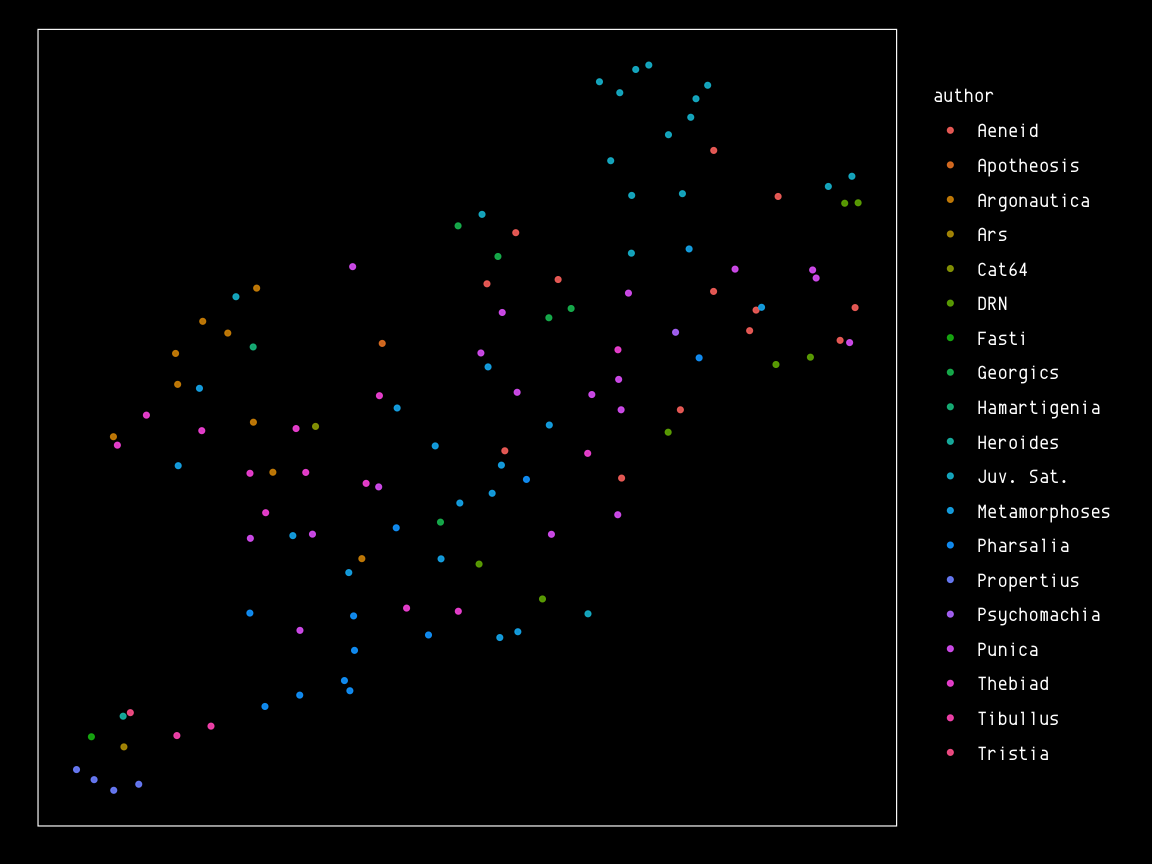

In [141]:
%%R -i umap_results -h 6 -w 8 -u in -r 144

source('/Users/ben/r/theme_black.R')

ggplot(data=umap_results,aes(x=X, y=Y)) +

geom_point(alpha=0.9, size=1, aes(color=author)) +
#scale_shape_manual(values=c(1,0,2,3,8,5,6,25,9,7)) + # shapes chosen to be 'easy' to read based on the plot.
theme_black() +
theme(plot.title = element_text(margin = margin(b = 50))) +
#theme(legend.position = c(0.83, 0.87), legend.title=element_blank()) +
guides(shape = guide_legend(ncol=2,override.aes = aes(label = ""))) +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
theme(text = element_text(size=7, family="Envy Code R"), panel.grid.major=element_blank(),panel.grid.minor=element_blank())

In [86]:
%%R -i vecs_df,ar_vecs_y,ar_vecs_auth -h 7 -w 7 -u in -r 320

# Do PCA
PCA <- prcomp(vecs_df)
vecs_df['Author'] <- ar_vecs_y

# Extract PC axes
PCAvalues <- data.frame(Author = ar_vecs_y, PCA$x)

# Extract loadings of the variables
PCAloadings <- data.frame(Variables = rownames(PCA$rotation), PCA$rotation)

PCAloadings <- 
  PCAloadings %>% 
  mutate(
    Angle = ((180/pi) * atan(PC2/PC1)),
    Offset = ((-2 * sign(PC1))/1.8), 
    length = PC1^2 + PC2^2
  )

magnification <- 1.6
arrow_cutoff <- 0.02
x_origin <- -3.75
y_origin <- 1.5
pca_summ <- summary(PCA)

# Plot
ggplot(PCAvalues, aes(x = PC1, y = PC2)) +
geom_rect(xmin=-5.2, xmax=-3.2, ymin = 0.45, ymax=1.85, color='grey35', fill='grey93', size=0.2) + 
# Direction lines for the 'biggest' contributors to PC1 & 2
# offset to make a 'compass rose' style inset
geom_segment(
aes(x = x_origin, y = y_origin, 
    xend = ((PC1*magnification) + x_origin), 
    yend = ((PC2*magnification) + y_origin)),
data = PCAloadings %>% filter(length >= arrow_cutoff),
color = "black", size=0.3,
arrow = arrow(length = unit(0.007, "npc"))
) + 
# Labels for the direction lines
geom_label_repel(
aes(label = str_to_upper(Variables), 
    x = (PC1  * (magnification) + x_origin), 
    y = (PC2  * (magnification) + y_origin)
),
color = "black",
size = 1.6, 
data = PCAloadings %>% filter(length >= arrow_cutoff),
segment.size=NA,
label.size=NA,
label.padding=0.05,
fill='grey93',
family = "Envy Code R"
) + 

# Plot the actual data points as labels. This can move them around quite a lot
# but the general impression is what we're looking for, here.
geom_label_repel(
    size = 1.5, 
    box.padding=0.02, 
    label.padding=0.11, 
    label.size=NA,
    family="Envy Code R",
    alpha=0.95,
    segment.size=NA,
    label=PCAvalues$Author,
    aes(fill=ar_vecs_auth)
) +
theme_light() +
theme(text = element_text(size=5, family="Envy Code R", color='black'), panel.grid.minor=element_blank(), legend.title=element_blank(), legend.position='none') +
labs(
    x=paste("PC 1: Explained Variance", round(pca_summ$importance[2,1]*100,2), "%"),
    y=paste("PC 2: Explained Variance", round(pca_summ$importance[2,2]*100,2), "%")
)

fn <- "/Users/ben/papers/dsh_rhyme/rhyme_pca_arrows.pdf"
ggsave(fn, dpi=320, height=7, width=7)
embed_fonts(fn)

In [83]:
%%R -i vecs_df,ar_vecs_y,ar_vecs_auth -h 7 -w 7 -u in -r 320

#source('/Users/ben/r/theme_black.R')
# Do PCA
PCA <- prcomp(vecs_df)
test <- summary(PCA)
#test$importance[2][1]
test$importance[2,2]


[1] 0.10988


In [725]:
vecs_df.to_pickle('vecs_df.pkl')

In [725]:
vecs_df.to_pickle('vecs_df.pkl')

In [4]:
import pickle

In [716]:
pickle.dump(ar_vecs_y, open( "ar_vecs_y.pkl", "wb" ) )

In [720]:
pickle.dump(ar_vecs_auth, open( "ar_vecs_auth.pkl", "wb" ) )

In [5]:
ar_vecs_y = pickle.load( open( "ar_vecs_y.pkl", "rb" ) )

In [6]:
ar_vecs_auth = pickle.load( open( "ar_vecs_auth.pkl", "rb" ) )

In [7]:
vecs_df = pickle.load( open( "vecs_df.pkl", "rb" ) )

In [13]:
%%R -i vecs_df,ar_vec_y,ar_vec_auth
pacman::p_load(readr)
v <- as.data.frame(vecs_df)
write_rds(as.data.frame(v), "foo")
# write_rds(ar_vecs_y, "ar_vecs_y.rds")
# write_rds(ar_vecs_auth, "ar_vecs_auth.rds")


In [739]:
ary_df = pd.DataFrame(ar_vecs_y)

In [740]:
arauth_df = pd.DataFrame(ar_vecs_auth)

In [741]:
vecs_df.to_csv("vecs_df.csv")

In [742]:
ary_df.to_csv("ar_vecs_y.csv")
arauth_df.to_csv("ar_vecs_auth.csv")

In [101]:
vecs_df[~vecs_df.index.str.contains('[0-9]')].sort_values(by='ra', ascending=False)

,H-aa -1,H-aa -2,H-aa 0,H-aa mid,H-axa -1,H-axa -2,H-axa 0,H-axa mid,H-axxa -1,H-axxa -2,...,P-axa 0,P-axa mid,P-axxa -1,P-axxa -2,P-axxa 0,P-axxa mid,P-leo,P-slant leo,ra,rs
work,,,,,,,,,,,,,,,,,,,,,
Propertius,1.014599,1.139130,1.959184,1.000000,1.085714,1.273196,1.788462,1.026087,0.927007,1.082969,...,1.062500,1.007194,1.064286,1.101322,1.340000,1.057851,2.492188,1.612903,2.328826,2.309809
Tibullus,1.045455,1.094595,2.375000,0.942857,0.982456,1.093750,2.272727,1.000000,0.800000,1.181818,...,1.130435,1.235294,0.837209,1.105263,1.250000,1.000000,2.000000,1.214286,1.943020,1.884326
Ars,1.111111,1.069231,2.388889,0.887097,0.931373,0.982759,1.487179,0.953846,1.122222,0.992126,...,1.142857,1.235294,0.888889,1.045802,0.972222,1.147541,2.013514,1.392857,1.398402,1.410636
Tristia,1.031008,1.067358,1.473684,1.076087,1.022059,1.049383,1.590164,1.164706,0.969466,1.141361,...,1.268657,0.962617,0.877863,0.957672,0.896552,1.021505,2.016807,1.336842,1.282169,1.239891
Heroides,0.965986,1.088106,2.000000,1.188679,0.993590,1.024631,1.622951,1.000000,0.959732,0.930131,...,1.000000,0.926230,0.893333,1.074561,1.137931,0.895238,1.837209,1.177083,1.277738,1.219041
Fasti,0.988764,1.122047,1.412500,1.075758,1.005076,1.008000,1.391304,1.046875,0.943820,0.968379,...,1.130435,0.993789,1.011236,1.023529,1.060241,1.030075,2.135802,1.344262,1.256502,1.309512
Pharsalia,0.993846,1.009390,1.102767,0.968944,1.020124,1.090695,1.082677,0.962963,1.006173,1.009302,...,1.082677,0.962963,1.006173,1.009302,1.164062,1.055670,1.279592,1.035519,0.786556,0.789273
Thebiad,1.009459,0.997897,0.993127,1.076321,1.057796,1.057652,1.023729,1.003876,0.994602,1.031315,...,1.023729,1.003876,0.994602,1.031315,1.041096,1.000000,1.448598,1.178484,0.382533,0.316807
Metamorphoses,1.054444,1.062877,1.196970,1.125203,1.065556,1.043365,1.091880,1.055016,0.991141,1.011986,...,1.091880,1.055016,0.991141,1.011986,1.028139,0.973899,1.342508,1.131021,0.306959,0.301637


In [96]:
vecs_df

,H-aa -1,H-aa -2,H-aa 0,H-aa mid,H-axa -1,H-axa -2,H-axa 0,H-axa mid,H-axxa -1,H-axxa -2,...,P-axa 0,P-axa mid,P-axxa -1,P-axxa -2,P-axxa 0,P-axxa mid,P-leo,P-slant leo,ra,rs
work,,,,,,,,,,,,,,,,,,,,,
Tristia,1.031008,1.067358,1.473684,1.076087,1.022059,1.049383,1.590164,1.164706,0.969466,1.141361,...,1.268657,0.962617,0.877863,0.957672,0.896552,1.021505,2.016807,1.336842,1.282169,1.239891
Tibullus 1,1.037037,1.080000,2.545455,0.954545,1.055556,1.023256,2.533333,1.000000,0.821429,1.244898,...,1.187500,1.205882,0.714286,1.100000,1.555556,1.000000,1.880000,1.052632,2.001723,1.950451
Tibullus 2,1.058824,1.083333,1.666667,0.923077,0.818182,1.181818,1.714286,1.090909,0.705882,1.200000,...,0.875000,1.222222,0.941176,1.160000,1.000000,1.083333,2.200000,1.400000,1.811147,1.691529
Tibullus,1.045455,1.094595,2.375000,0.942857,0.982456,1.093750,2.272727,1.000000,0.800000,1.181818,...,1.130435,1.235294,0.837209,1.105263,1.250000,1.000000,2.000000,1.214286,1.943020,1.884326
Cat64,1.000000,0.957447,1.583333,0.916667,0.551724,1.043478,1.000000,1.480000,0.900000,1.065217,...,1.000000,1.480000,0.900000,1.065217,1.000000,0.920000,1.541667,1.222222,0.695816,0.378722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hamartigenia,1.060606,1.158537,0.814815,1.020833,1.151515,0.903614,1.333333,1.212766,0.969231,1.074074,...,1.333333,1.212766,0.969231,1.074074,1.346154,0.875000,1.977778,1.250000,-0.110831,-0.160320
Psychomachia,1.014925,0.876404,0.730769,0.891304,0.954545,1.000000,1.538462,1.069767,1.238806,0.942529,...,1.538462,1.069767,1.238806,0.942529,1.115385,1.116279,1.444444,0.939394,-0.570644,-0.461375
Hor. Sat. 1,1.122807,1.054054,1.407407,1.022222,1.169492,0.947368,1.296296,0.866667,1.189655,1.129870,...,1.296296,0.866667,1.189655,1.129870,0.931034,1.000000,1.288889,1.125000,-1.563148,-1.455854
